**bold text**
The purpose of this project is to segregate fake news from real news by using a suitable data science model such as Naïve Bayes.

Simple Approach for the Problem:

1. Data Collection:

 (fakes news and real news datasets)
2. Data Preprocessing:

 filter and manipulate columns, adding labels (fake or real), and merge on selected columns, data       visualization

3. Preprocessing the text: 
 NLP Approach

4. Text to features conversion:
  data cleaning
  removing stopwords
  removing punctuation
   
6. Model Implementation
  Naive Bayes
7. Check on Model Performance
  Classification Report 

In [ ]:
import numpy as np 
import pandas as pd 


In [ ]:
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

In [ ]:
#checking shape for both files
print(fake.shape)
print(real.shape)

(23481, 4)
(21417, 4)


In [ ]:
print('FAKE',fake.isnull().sum())
print('REAL',real.isnull().sum())


FAKE title      0
text       0
subject    0
date       0
dtype: int64
REAL title      0
text       0
subject    0
date       0
dtype: int64


In [ ]:
print(list(fake.columns))
print(list(real.columns))

['title', 'text', 'subject', 'date']
['title', 'text', 'subject', 'date']


# New section

In [ ]:
#adding label to fake
fake['label'] = 'fake'
fake.head(5)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [ ]:
#adiing label to Real
real['label'] = 'real'
real.head(5)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real


In [ ]:
# let's concatenate the dataframes
frames = [fake, real]
news_dataset = pd.concat(frames)
news_dataset

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",real
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",real
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",real
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",real


In [ ]:
news_dataset.describe()

,title,text,subject,date,label
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",fake
freq,14,627,11272,182,23481


In [ ]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [ ]:
final_data = news_dataset.dropna()

In [ ]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
#Data Cleaning
import nltk
nltk.download('stopwords')
import copy
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# removing punctuations 
import string
def text_process(title):
      
    nop = [char for char in title if char not in string.punctuation]
    
    nop = ''.join(nop)
    
    return [word for word in nop.split() if word in word.lower() not in stopwords.words('english')]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Naive model with hyper parameters
  piplineTitle = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
  ])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_data['title'], final_data['label'], test_size=0.2, random_state=123)

In [ ]:
y_pred = piplineTitle.fit(X_train, y_train).predict(X_test)
y_pred

array(['real', 'fake', 'real', ..., 'real', 'fake', 'fake'], dtype='<U4')

In [ ]:
clf_report = classification_report(y_test, y_pred)
print('Classification_Report',clf_report)

Classification_Report               precision    recall  f1-score   support

        fake       0.97      0.99      0.98      4556
        real       0.99      0.97      0.98      4424

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Cnfusion Matrix',cnf_matrix)

Cnfusion Matrix [[4505   51]
 [ 127 4297]]


Text(158.22222222222223, 0.5, 'truth')

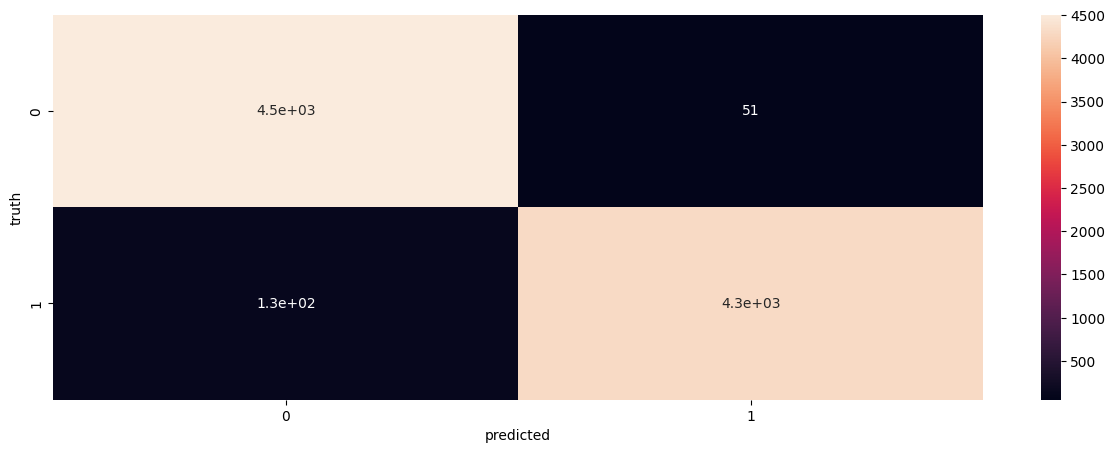

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sns.heatmap(cnf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')